## 回帰分析
今回は線形回帰とその正則化について扱います。

### 回帰分析とは

変数$y$を予測したい。
これに対して説明変数$x_1,\ldots,x_k$が与えられている。
学習データとして$(x_1^{(1)},\ldots,x_k^{(1)},y^{(1)}),\ldots,(x_1^{(N)},\ldots,x_k^{(N)},y^{(N)})$が与えられたとする。
この時線形モデル

$$
y=f_w(x)=w_0+w_1x_1+\cdots+w_kx_k+\epsilon
$$

を推定する。
ここで$\epsilon$は正規分布$N(0,\sigma^2)$に独立に従うと仮定する。

### 単回帰

まずは説明変数が一つのモデルを考えよう。
このようなモデルのことを単回帰という。

学習データ$(x^{(i)},y^{(i)})$で$i=1,\ldots,N$が与えられたとする。
$y$を記述するモデル$y=w_0+w_1x=f_w(x)$を学習しよう。
この式$y=w_0+w_1x$は$xy$平面上の直線を表す。

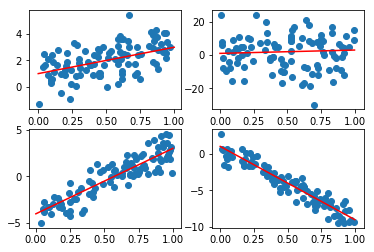

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N=100

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

X=np.linspace(0,1,100)

x=np.random.rand(N)
w0,w1=1,2
sigma=1.0
e=np.random.normal(0,sigma,N)
y=w0+w1*x+e
ax0.scatter(x,y)
ax0.plot(X,w0+w1*X,c='r')

x=np.random.rand(N)
w0,w1=1,2
sigma=10
e=np.random.normal(0,sigma,N)
y=w0+w1*x+e
ax1.scatter(x,y)
ax1.plot(X,w0+w1*X,c='r')

x=np.random.rand(N)
w0,w1=-4,7
sigma=1.0
e=np.random.normal(0,sigma,N)
y=w0+w1*x+e
ax2.scatter(x,y)
ax2.plot(X,w0+w1*X,c='r')


x=np.random.rand(N)
w0,w1=1,-10
sigma=1.0
e=np.random.normal(0,sigma,N)
y=w0+w1*x+e
ax3.scatter(x,y)
ax3.plot(X,w0+w1*X,c='r')

plt.show()

$\sigma$が大きいと直線への当てはまりが悪くなる。
予測の精度と関係する。

### 最小二乗法

$$
E(w)=\sum_{i=1}^{N}(y^{(i)}-f_w(x^{(i)}))^2
$$

を最小にする$w$を求める。これを最小二乗法という。

以下の手順に従って、学習データが与えられた時の回帰モデルのパラメータを決定せよ。

- モデルの式を$y=w_0+w_1x$として、$E(w_0,w_1)$を記述する。
- $E$の偏微分$\dfrac{\partial E}{\partial w_0},\dfrac{\partial E}{\partial w_1}$を計算する。
- これらを共に$0$にするような$w_0,w_1$を求める。


$$
E=\sum_i(y^{(i)}-w_0-w_1x^{(i)})^2
$$
であり、
$$
\frac{\partial E}{\partial w_0}=\sum_i(-2y^{(i)}-2w_0-2w_1x^{(i)})=0\\
\frac{\partial E}{\partial w_1}=\sum_i(-2y^{(i)}x^{(i)}-2w_0x^{(i)}-2w_1(x^{(i)})^2)=0
$$
を解けば良い。
これは実際には$w_0, w_1$に関する連立一次方程式。
これを正規方程式という。

この場合にはモデルが単純なので、$E$を最小化する$w$の値をきっちり求めることができる。

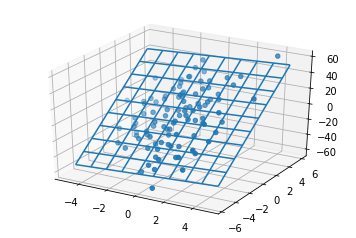

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

N=100

mean = [0, 0]
cov = [[3, 0], [0, 5]]
x, y = np.random.multivariate_normal(mean, cov, 100).T

w0, w1, w2=0,1,10
sigma=5

e=np.random.normal(0,sigma,N)
ax.scatter(x,y,w0+w1*x+w2*y+e)

X=np.linspace(-5,5,10)
Y=np.linspace(-5,5,10)
X, Y = np.meshgrid(X, Y)
ax.plot_wireframe(X,Y,w0+w1*X+w2*Y,cmap=cm.Reds)

plt.show()

### 重回帰

一般に説明変数を複数持つモデルを考えよう。
こちらも同様に最小二乗法でモデルの推定ができる。

変数が大量にあってややこしいので行列とベクトルを用いて書くことにしよう。

学習データ$(y^{(1)},x_0^{(1)}=1,x_1^{(1)},\ldots,x_k^{(1)}),\ldots,(y^{(1)},x_0^{(N)}=1,x_1^{(N)},\ldots,x_k^{(N)})$が与えられた時、
行列$X=\begin{pmatrix}x_0^{(1)}&\cdots&x_k^{(1)}\\ \vdots \\ x_0^{(N)}&\cdots &x_k^{(N)}\end{pmatrix}$とし
$y=\begin{pmatrix}y^{(1)}\\ \vdots \\ y^{(N)}\end{pmatrix}$とする。
この時最小二乗法による誤差関数は
$$
E(w)=(y-Xw)^T(y-Xw)
$$
とかける。

ベクトル$w, a$および行列$A$を
$$
w=\begin{pmatrix}w_0\\w_1\\ \vdots \\ w_k\end{pmatrix},
a=\begin{pmatrix}a_0\\a_1\\ \vdots \\ a_k\end{pmatrix},
A=\begin{pmatrix}a_{00}&a_{01}&\cdots&a_{0k}\\ \vdots &\vdots&\cdots&\vdots\\ a_{k0}&a_{k1}&\cdots&a_{kk}\end{pmatrix}
$$
とする。
関数
$$
f(w)=a^Tw=a_0w_0+a_1w_1+\cdots+a_kw_k\\
g(w)=w^Ta=w_0a_0+w_1a_1+\cdots+w_ka_k\\
h(w)=w^TAw\\
=w_0(w_0a_{00}+w_1a_{01}+\cdots+w_ka_{0k})+w_1(w_0a_{10}+w_1a_{11}+\cdots+w_ka_{1k})+\cdots\\
+w_k(w_0a_{k0}+w_1a_{k1}+\cdots+w_ka_{kk})
$$
の勾配はそれぞれ
$$
grad(f)=a\\
grad(g)=a\\
grad(h)=(A+A^T)w
$$
となる。

上の公式を使って$grad(E)$を計算すると
$$
grad(E)=X^Ty-X^TXw
$$
となり、これが$0$となる$w$は$w=(X^TX)^{-1}X^Ty$と求めることができる。

$X^TX$に逆行列が必ず存在するのか？
ほとんどの場合そのまま存在し、もし存在しなくてもデータをほんのわずかずらせば逆行列が存在するようにできる

### 正規方程式

上の計算をまとめると、
$$
w=(X^TX)^{-1}X^Ty
$$

と正確に計算できる。

単回帰の時の式がこれから出てくることを確認しよう。

これを実装しよう。今回は行列の計算は例えばnumpyを使ってやることにします。

## 最尤法

最小二乗法の式は最尤法でパラメータ$w_0, w_1$を推定した結果であるとみなすことができる。
それを説明しよう。

$y$の誤差が平均0で分散$\sigma^2$の正規分布に従うとすれば、
$y$も平均$f(x)$で分散$\sigma^2$の正規分布に従うことがわかる。

観測データが$(x_1,y_1),\ldots,(x_N,y_N)$と与えられた場合、尤度関数

$$
\prod_{i=1}^N\frac{1}{\sqrt{2\pi\sigma^2}}\exp(-\frac{1}{2\sigma^2}(y_i-f_w(x_i))^2)
$$

を最大化するパラメタ$w, \sigma^2$を選択する。
これは結局

$$
E(w)=\sum^N_{i=1}(y_i-f_w(x_i))^2
$$

を最小化すればよい。

これを最小二乗法という。
つまり、観測値$y_i$とモデルによる予測値$f_w(x_i)$の差の二乗の和を最小にしよう、ということ。


## 正則化

過学習を防ぐために正則化をする必要がある。
ここでは回帰のモデル推定においてパラメタ$w$の事前分布を設定することで正則化項が現れることを見よう。

### Ridge回帰

まずは$w$が$k+1$変数の正規分布に従うとする。（これは正規分布に対して自然な共役分布である。）
この場合に密度関数は
$$
f(w_0,\ldots,w_k)=\frac{1}{2\pi\alpha^2}\exp(-\dfrac{w_0^2+\cdots+w_k^2}{2\alpha^2})
$$
で与えられる。

ベイズの定理を使って事後分布の尤度関数を計算すると、
$$
\prod_i\exp(-\frac{1}{2\sigma^2}(y^{(i)}-f_w(x^{(i)}))^2)\times\frac{1}{2\pi\alpha^2}\exp(-\dfrac{w_0^2+\cdots+w_k^2}{2\alpha^2})
$$
となる。
密度関数は積分を計算しないといけないので今回は省略するが、これの定数倍になる。

つまり
$$
E(w)=\sum_{i=1}^N(y^{(i)}-(w^Tx^{(i)}))^2+\lambda\sum_{i=0}^Nw_i^2
$$
なる関数を最小化することになる。
ここで$\lambda=\sigma^2/\tau^2$である。

この解は重回帰の時と同じように偏微分を計算することで正確に求めることができて、
$$
\hat{w}_{ridge}=(\lambda I_k+X^TX)^{-1}X^Ty
$$
となる。
これをridge回帰という。

### Lasso回帰

事前分布を正規分布以外の分布にすれば異なる正則化項を導くことができる。

事前分布をラプラス分布とする。
この場合に密度関数は
$$
f(w_0,\ldots,w_k)=\frac{1}{2\pi\alpha^2}\exp(-\dfrac{|w_0|+\cdots+|w_k|}{2\alpha^2})
$$
で与えられる。

この場合の誤差関数は
$$
E(w)=\frac{1}{N}\sum_i^N(y^{(i)}-(w^Tx^{(i)}))^2+\lambda\sum_{i=0}^N|w_i|
$$
なる関数を最小化することになる。
これをlasso回帰と呼ぶ。


lasso回帰では誤差関数
$$
E(w)=\sum_{i=1}^N(y^{(i)}-(w^Tx^{(i)}))^2+\lambda\sum_{i=0}^N|w_i|
$$
を最小化する。

## 分析の実践例
テキストにあるようにHousingデータセットを分析しよう。
各変数は順に、犯罪発生率、住宅区画の割合、非小売業の土地面積の割合、チャールズ川沿いかどうか、窒素酸化物濃度、平均部屋数、1940年以前に建てられた家屋の割合、主な雇用圏までの重み付き距離、幹線道路へのアクセス、所得税率、教師あたりの生徒数、アフリカ系アメリカ人居住者の割合、低所得者の割合、価格中央値である。

ここでは価格中央値を予測するモデルを作ろう。

In [17]:
#テキスト10章
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'housing/housing.data',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
df.shape

(506, 14)

まずは変数間の関係を可視化する。いくつかの変数をピックアップしてその散布図と相関係数を図示したもの。

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


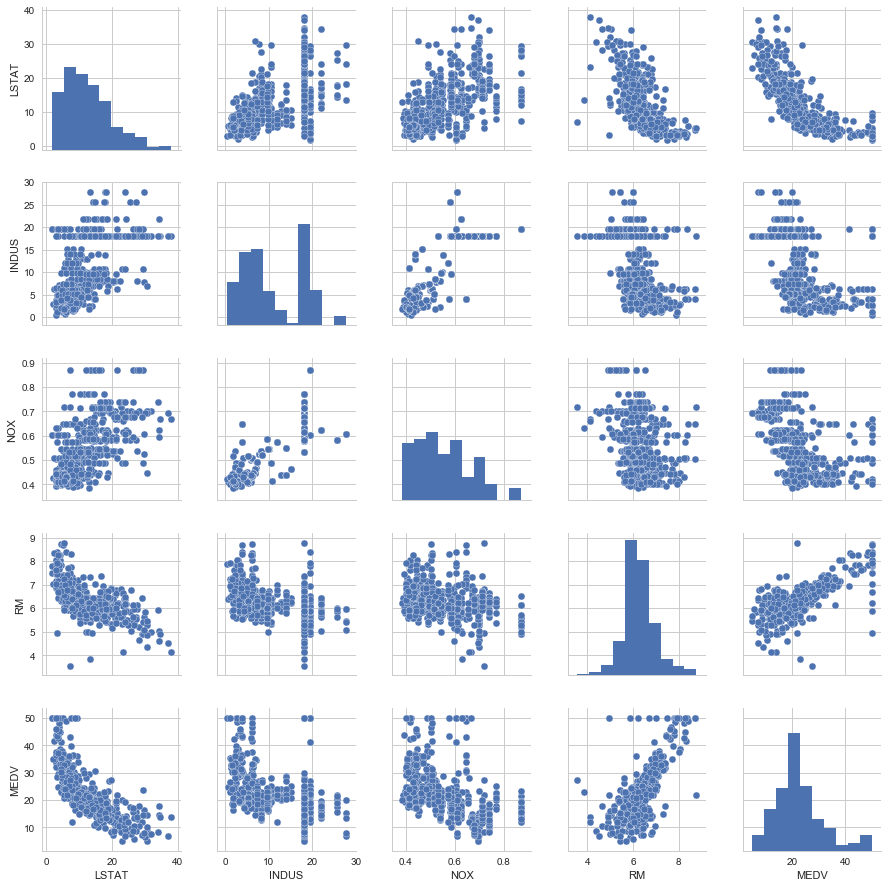

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

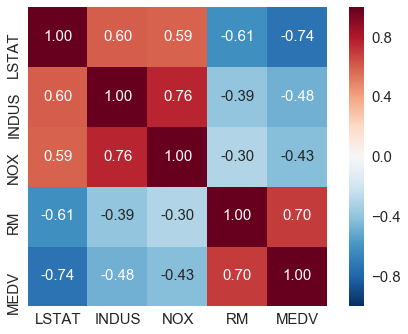

In [31]:
import numpy as np


cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

# plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

まずは単回帰で分析してみる。ここでは平均部屋数を説明変数にした単回帰分析。

In [7]:
from sklearn.linear_model import LinearRegression
X = df[['RM']].values
y = df['MEDV'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


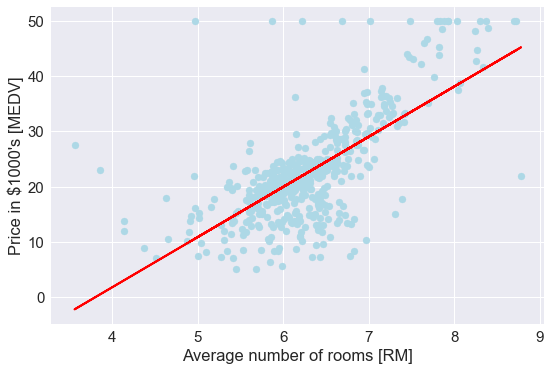

In [11]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return 
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
# plt.savefig('./figures/scikit_lr_fit.png', dpi=300)
plt.show()

## ロバスト回帰
外れ値の処理方法。ここではRANSACを紹介する。他にも正規分布以外の分布を仮定する方法もある。

RANSACのアルゴリズム。
- まずランダムにサンプルを取り、モデルを学習する。
- 次に残りのデータの中からあらかじめ指定したパラメータに基づいて正常値を選び、モデルを学習し直す。
- 性能を評価し、閾値を超えていれば終了、そうでなければ最初に戻る

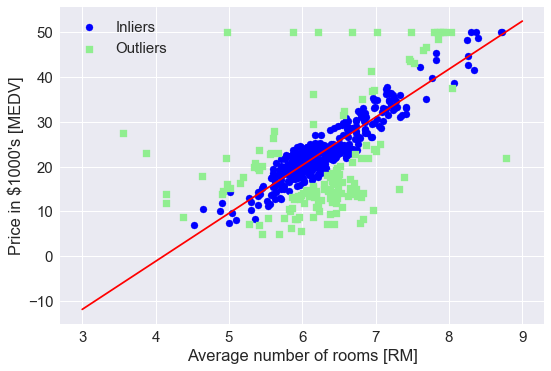

In [9]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                             max_trials=100, 
                             min_samples=50, 
                             loss='absolute_loss', 
                             residual_threshold=5.0, 
                             random_state=0)


ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/ransac_fit.png', dpi=300)
plt.show()

In [10]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


## 性能評価

決定係数R^2と平均二乗誤差MSEを用いて性能を評価する。
$$
MSE=\frac{1}{n}\sum_i(y^{(i)}-\hat{y}^{(i)})^2\\
R^2=1-\frac{MSE}{Var(y)}
$$
である。

In [12]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [13]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

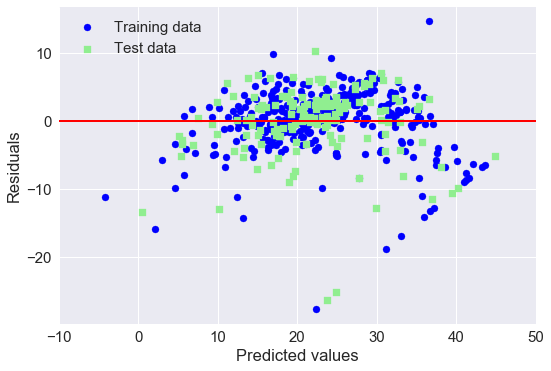

In [14]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [16]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


## 正則化

ここではL1正則化のコード例を紹介する。
`alpha`は正則化の強さを決めるパラメータ。

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.11311792  0.04725111 -0.03992527  0.96478874 -0.          3.72289616
 -0.02143106 -1.23370405  0.20469    -0.0129439  -0.85269025  0.00795847
 -0.52392362]


In [29]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 20.926, test: 28.876
R^2 train: 0.753, test: 0.653


以下のコードはAIC, BICを用いたモデル選択のコード例を紹介する。
$$
AIC = -2 \log L + 2k\\
BIC = -2 \log L + k\log n
$$
である。ここで$L$は尤度関数。

特に線形回帰におけるAICとBICは
$$
AIC=\sum_i n\log\frac{2\pi}{n}\sigma_i^2+ 2k \\
BIC=\sum_i n\log\frac{2\pi}{n}\sigma_i^2+ k\log n
$$
として計算できる。ここで$\sigma_i$は各標本の誤差、$k$はパラメータ数、$n$はサンプル数。

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log10


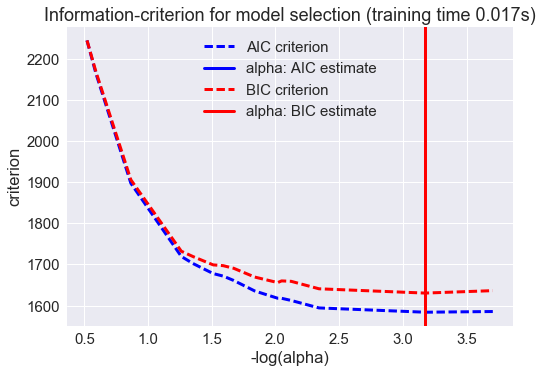

In [25]:
#http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)
plt.show()

### 課題
説明変数を取り替える、正則化パラメータを変える、などして試験データの決定係数が一番良いモデルを探そう。
AICやBICを指標として用いてもよい。可能であれば交差検証もすること。
学習曲線をプロットしてみるなども試みてみるとよいかもしれない。

## 課題、交差検証

重回帰モデル、正則化モデルの決定係数を交差検証により比較する。
最適な正則化パラメータを探す。

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits = 5)

X = df.iloc[:, :-1].values
y = df['MEDV'].values

Rsq=[]
mse=[]
for train, test in kf.split(X):
    slr = LinearRegression()
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    slr.fit(X_train, y_train)
    y_test_pred = slr.predict(X_test)
    Rsq.append(r2_score(y_test, y_test_pred))
    mse.append(mean_squared_error(y_test, y_test_pred))

In [30]:
Rsq

[0.63919993713967105,
 0.71386698038332774,
 0.58702343630578158,
 0.079230805405087312,
 -0.25294153725446789]

In [31]:
mse

[12.460300569202069,
 26.048621106234197,
 33.074137979764487,
 80.762371119196715,
 33.313606564097952]